Using unsupervised constructed features for pattern Recoginition

To get unsupervised contructed features of an image, we have used a pretrained CNN as feature extractor. For this purpose we pushed each image through a pretrained CNN and extracted the activations in the first fully connected layer. As pretrained CNN we use a VGG16 architecture that was trained on ImageNet data and was the second winner of the ImageNet competition in 2014.

In this manner we have got unsupervised constructed features for 1250 images of the Retinopathy Detection data set and  In  data sets we have 5 distinguished classes. The data sets are balanced meaning we have 250 images per class. To assess if the extracted features are good, we do a PCA and t-SNE visualization and check if we can observe 10 clusters corresponding to the 10 classes. As baseline benchmark we do the PCA and t-SNE with the raw image pixels. Then we also do a PCA and t-SNE with the VGG-features.

In [21]:
base_image_dir = os.path.join('train/')
df = pd.read_csv(os.path.join('trainLabels.csv'))
df['path'] = df['image'].map(lambda x: os.path.join(base_image_dir,'{}.jpeg'.format(x)))
df['exists'] = df['path'].map(os.path.exists) #Most of the files do not exist because this is a sample of the original dataset
df = df[df['exists']]
df = df.drop(columns=['image','exists'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
df.head(10)

,level,path
0,0,train/19810_right.jpeg
1,0,train/31862_right.jpeg
2,0,train/355_left.jpeg
3,0,train/34939_left.jpeg
4,0,train/44059_right.jpeg
5,2,train/32216_right.jpeg
6,0,train/22104_left.jpeg
7,4,train/33080_left.jpeg
8,1,train/23263_right.jpeg
9,0,train/12793_left.jpeg


In [3]:
from PIL import Image
import numpy as np
import random
import os
import pandas as pd
%matplotlib inline
import numpy as np
trainLabels = pd.read_csv("trainLabels.csv")

# listing = os.listdir("train/") 
# i=0
# img_rows, img_cols = 256, 256


# immatrix = []
# imlabel = []

# while i<5000 :
#     file=random.choice(listing)
    
#     if i%500==0:

#         print (i)
#     i+=1
#     base = os.path.basename("train/" + file)
#     fileName = os.path.splitext(base)[0]
#     imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
#     im = Image.open("train/" + file)
#     img = np.array(im.resize((img_rows,img_cols)))
#     immatrix.append(img)
      

      
    
#     # convert to green channel only
#     #img[:,:,[0,2]] = 0
    

    
    
    

   

In [12]:
immatrix=np.load("pickle5.npy")
imlabel=np.load("pickle6.npy")

In [13]:
i_0=np.where(imlabel==0)[0]
i_1=np.where(imlabel==1)[0]
i_2=np.where(imlabel==2)[0]
i_3=np.where(imlabel==3)[0]
i_4=np.where(imlabel==4)[0]
index=np.concatenate([np.random.choice(i_0, 250),np.random.choice(i_1, 250),np.random.choice(i_2, 250),np.random.choice(i_3, 250),np.random.choice(i_4, 250)])
immatrix=immatrix[index]
imlabel=imlabel[index]

In [34]:
immatrix.shape

(1250, 256, 256, 3)

The PCA and TSNE do not yield a clear seperation or presence of a cluster.
The PCA is not able to resolve a 2D representation of data.

In [15]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
immatrix=np.array(immatrix)
pca.fit(immatrix.reshape((len(immatrix),256*256*3)))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

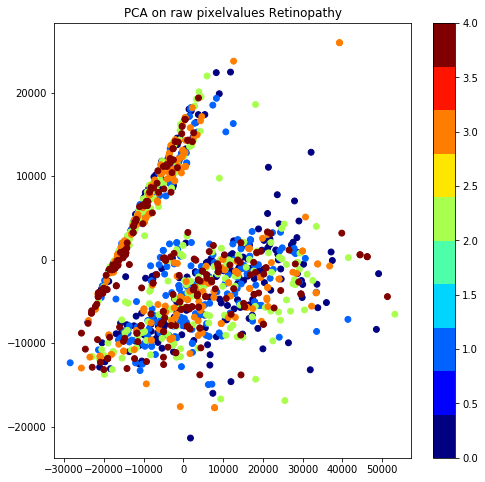

In [16]:
import matplotlib.pyplot as plt
from pylab import *
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(immatrix.reshape((len(immatrix),256*256*3)))[:,0],
            y=pca.transform(immatrix.reshape((len(immatrix),256*256*3)))[:,1],
            c=imlabel.reshape(len(immatrix)),s=35,cmap=cmap)
plt.title("PCA on raw pixelvalues Retinopathy")
plt.colorbar()
plt.show()

In [17]:
# takes some time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(immatrix.reshape((len(immatrix),256*256*3)))

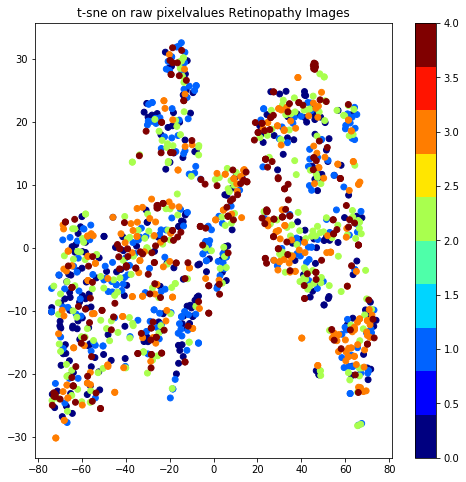

In [18]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=imlabel.reshape(len(immatrix)),s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues Retinopathy Images")
plt.colorbar()
plt.show()

Finally we insert features from  vgg16 model intp pca and tsne. Generally the tsne representation should give good clusters.

In PCA we see three linear clusters and tsne yields about 5 broad clusters.
However the presence of points from all three classes all over indicates that even the forst layer of VGG is finding hard to differentiate between classes indicating the challenges that lie ahead of us in the supervised classification task.



In [19]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()



Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block

In [22]:
import random
labels=[]
vgg16_feature_list = []

for i in random.sample(range(1,35000),1000):

    
        labels.append(df["level"][i])
  
        
        img = image.load_img(df['path'][i], target_size=(256, 256))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())
        
vgg16_feature_list_np = np.array(vgg16_feature_list)

In [35]:
import random

vgg16_feature_list = []

for img in immatrix:

    
        
  
        
        
        img_data = img
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())
        
vgg16_feature_list_np = np.array(vgg16_feature_list)

In [28]:
vgg16_feature_list_np[0].shape

(32768,)

In [31]:
labels=np.array(labels)

In [36]:
pca = PCA(n_components=2)
pca.fit(vgg16_feature_list_np)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

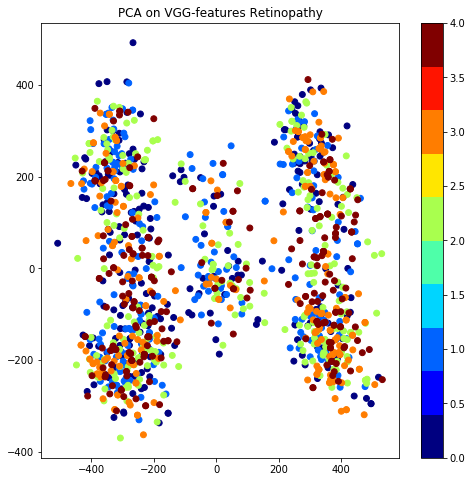

In [39]:
labels=np.array(imlabel)
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(vgg16_feature_list_np)[:,0],
            y=pca.transform(vgg16_feature_list_np)[:,1],
            c=labels.reshape(len(vgg16_feature_list)),s=35,cmap=cmap)
plt.title("PCA on VGG-features Retinopathy")
plt.colorbar()
plt.show()

In [40]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(vgg16_feature_list_np)

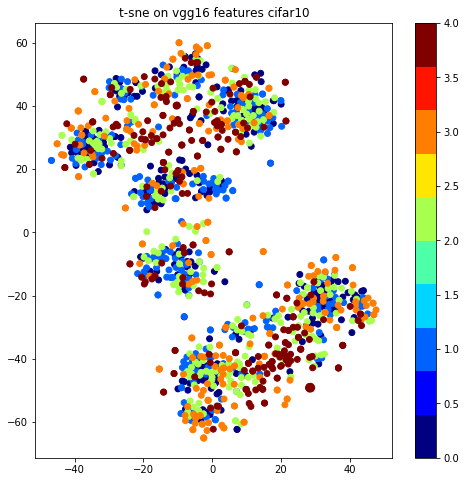

In [41]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=imlabel.reshape(len(immatrix)),s=35,cmap=cmap)
plt.title("t-sne on vgg16 features cifar10")
plt.colorbar()
plt.show()